In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# read in training dataset and check it out
df = pd.read_csv('train.csv', header=0, index_col='Id')
df.shape
df.head()

(1460, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# separate features from target
X_full = df.iloc[:,:79]
y_full = df.iloc[:,79]

## Clean and process data 
#### (some data exploration at bottom of notebook)

In [5]:
# check for missing values by object type
for col in np.sort(X_full.columns):
    num_nan = np.sum(X_full[col].isnull())
    if (num_nan > 0): print(col, '\t', num_nan)
np.sort(df.select_dtypes(include=['float']).columns)
np.sort(df.select_dtypes(include=['int']).columns)

Alley 	 1369
BsmtCond 	 37
BsmtExposure 	 38
BsmtFinType1 	 37
BsmtFinType2 	 38
BsmtQual 	 37
Electrical 	 1
Fence 	 1179
FireplaceQu 	 690
GarageCond 	 81
GarageFinish 	 81
GarageQual 	 81
GarageType 	 81
GarageYrBlt 	 81
LotFrontage 	 259
MasVnrArea 	 8
MasVnrType 	 8
MiscFeature 	 1406
PoolQC 	 1453


array(['GarageYrBlt', 'LotFrontage', 'MasVnrArea'], dtype=object)

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

In [6]:
# Need to convert categorical values to integer classes
# For all categorical features except 'Electrical' and 'MasVnrType', NaN represents 'none'.
# Electrical only has one NaN.
# So, all but 'MasVnrType' need to be replace nan with 'None'.
# For 'MasVnrType', 'None' is used rather than NaN, so just replace 'None' with  NaN first

for col in X_full.select_dtypes(include=['object']).columns:
    X_full.loc[X_full[col].isnull(), col] = 'None'

In [7]:
# Look at mean and median for 'LotFrontage' and 'GarageYrBlt' to determine how to impute
df['LotFrontage'].describe()
df['GarageYrBlt'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [8]:
# For 'LotFrontage' and 'GarageYrBlt', the mean and the median are nearly the same, so just replace NaN's with median
# For 'MasVnrArea', only 8 rows have missing values, so just use mean
X_full.loc[:,'LotFrontage'] = preprocessing.Imputer(strategy='median').fit_transform(df['LotFrontage'].values.reshape(-1,1))
X_full.loc[:,'GarageYrBlt'] = preprocessing.Imputer(strategy='median').fit_transform(df['LotFrontage'].values.reshape(-1,1))
X_full.loc[:,'MasVnrArea'] = preprocessing.Imputer(strategy='mean').fit_transform(df['LotFrontage'].values.reshape(-1,1))

In [9]:
# Now we are ready to perform the label encoding necessary for the ML algorithm inputs
le = preprocessing.LabelEncoder()

In [13]:
# Use LabelEncoder on categorical variables
for col in X_full.select_dtypes(include=['object']).columns:
    le.fit(X_full[col].unique());
    X_full.loc[:,col] = le.transform(X_full[col]);

In [14]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,8,4
2,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,8,4
3,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,8,4
4,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,8,0
5,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,8,4


In [15]:
# verify no missing values by absence of any printed results
for col in np.sort(X_full.columns):
    num_nan = np.sum(X_full[col].isnull())
    if (num_nan > 0): print(col, '\t', num_nan)  

## Train models - Random Forest, Gradient Boosting

In [16]:
# Random Forest
# Number of estimators chosen by trial
RF = RandomForestRegressor(n_estimators=200, n_jobs=-1)
RF.fit(X_full, y_full)
cross_val_score(RF, X_full, y_full)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

array([ 0.89021263,  0.84533062,  0.83075153])

In [17]:
# Gradient Boosting
# Hyper parameters chosen by trial; subsample prevents overfitting
GB = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, subsample=0.8)
GB.fit(X_full, y_full)
cross_val_score(GB, X_full, y_full)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=0.8, verbose=0,
             warm_start=False)

array([ 0.91240326,  0.83746565,  0.87293315])

#### Gradient boosting model is slightly better.

In [35]:
# feature importance
X_full.loc[:, RF.feature_importances_>0.04].columns
X_full.loc[:, GB.feature_importances_>0.04].columns

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea'], dtype='object')

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'GarageArea'],
      dtype='object')

### Make predictions

In [43]:
# predict on full training set
pred_RF = RF.predict(X_full)
pred_GB = GB.predict(X_full)

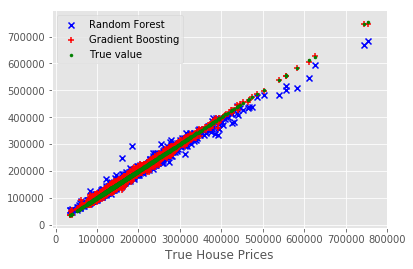

In [53]:
# visualize predicted values versus true values
plt.scatter(y_full, pred_RF, c='b', marker='x');
plt.scatter(y_full, pred_GB, c='r', marker='+');
plt.scatter(y_full, y_full, c='g', marker='.');
plt.xlabel('True House Prices');
plt.legend(('Random Forest', 'Gradient Boosting', 'True value'));

#### Process X_test and write prediction to csv file

In [54]:
X_test = pd.read_csv('test.csv', header=0, index_col='Id')
# For 'LotFrontage' and 'GarageYrBlt', the mean and the median are nearly the same, so just replace NaN's with median
# For 'MasVnrArea', only 8 rows have missing values, so just use mean
X_test.loc[:,'LotFrontage'] = preprocessing.Imputer(strategy='median').fit_transform(X_test['LotFrontage'].values.reshape(-1,1))
X_test.loc[:,'GarageYrBlt'] = preprocessing.Imputer(strategy='median').fit_transform(X_test['LotFrontage'].values.reshape(-1,1))
X_test.loc[:,'MasVnrArea'] = preprocessing.Imputer(strategy='mean').fit_transform(X_test['LotFrontage'].values.reshape(-1,1))

In [56]:
# Need to convert categorical values to integer classes
for col in X_test.select_dtypes(include=['object']).columns:
    X_test.loc[X_test[col].isnull(), col] = 'None'
    
# Use LabelEncoder on categorical variables
for col in X_test.select_dtypes(include=['object']).columns:
    le.fit(X_test[col].unique());
    X_test.loc[:,col] = le.transform(X_test[col])

In [58]:
# missing values here should be replaced with the value 0
for col in np.sort(X_test.columns):
    num_nan = np.sum(X_test[col].isnull())
    if (num_nan > 0): print(col, '\t', num_nan)  
np.sort(X_test.select_dtypes(include=['float']).columns)

BsmtFinSF1 	 1
BsmtFinSF2 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
BsmtUnfSF 	 1
GarageArea 	 1
GarageCars 	 1
TotalBsmtSF 	 1


array(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt',
       'LotFrontage', 'MasVnrArea', 'TotalBsmtSF'], dtype=object)

In [59]:
for col in X_test.select_dtypes(include=['float']).columns:
    X_test.loc[X_test[col].isnull(), col] = 0

In [60]:
# check that missing values have been replaced with value 0
for col in np.sort(X_test.columns):
    num_nan = np.sum(X_test[col].isnull())
    if (num_nan > 0): print(col, '\t', num_nan)  

In [61]:
# create submission using Gradient Boosting model
submission = GB.predict(X_test)

In [62]:
# convert submission to a dataframe with index and columns appropriate for submission
submission_df = pd.DataFrame(submission, index=X_test.index, columns=['SalePrice'])
submission_df.head()

,SalePrice
Id,
1461,128625.400832
1462,168641.095145
1463,168439.061371
1464,179230.108835
1465,174641.882429


In [211]:
# write submission to csv
submission_df.to_csv('my_house_prices_submission.csv')

# Data Exploration (messy)

In [114]:
df.shape
df.columns

(1460, 80)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [115]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [177]:
for col in np.sort(df.columns):
    num_nan = np.sum(df[col].isnull())
    if (num_nan > 0): print(col, '\t', num_nan)
np.sort(df.select_dtypes(include=['float']).columns)
np.sort(df.select_dtypes(include=['int']).columns)

Alley 	 1369
BsmtCond 	 37
BsmtExposure 	 38
BsmtFinType1 	 37
BsmtFinType2 	 38
BsmtQual 	 37
Electrical 	 1
Fence 	 1179
FireplaceQu 	 690
GarageCond 	 81
GarageFinish 	 81
GarageQual 	 81
GarageType 	 81
GarageYrBlt 	 81
LotFrontage 	 259
MasVnrArea 	 8
MasVnrType 	 8
MiscFeature 	 1406
PoolQC 	 1453


array(['GarageYrBlt', 'LotFrontage', 'MasVnrArea'], dtype=object)

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

##### The 'float' types have missing values but the 'int' types do not.
##### Need to replace missing values for 'GarageYrBlt', 'LotFrontage', 'MasVnrArea'

In [180]:
df[df.select_dtypes(include=['float']).columns].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [ ]:
# For 'LotFrontage' and 'GarageYrBlt', the mean and the median are nearly the same, so just replace NaN's with median
# For 'MasVnrArea', only 8 rows have missing values, so just use mean

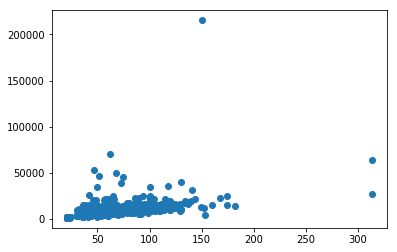

In [163]:
plt.scatter(df['LotFrontage'], df['LotArea'])

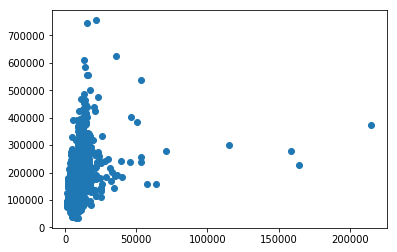

In [158]:
plt.scatter(df['LotArea'], df['SalePrice'])

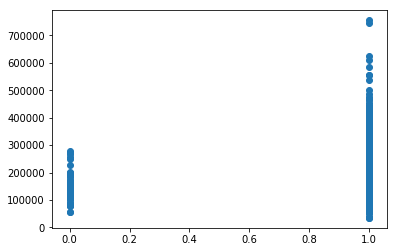

In [44]:
plt.scatter(df['MiscFeature'].isnull(), df['SalePrice']) # Can replace these values with 0,1

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

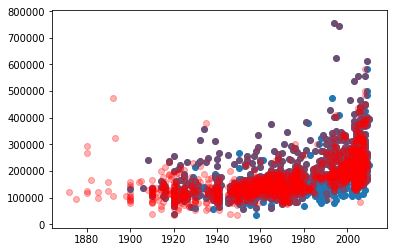

In [106]:
plt.scatter(df['GarageYrBlt'], df['SalePrice'])
plt.scatter(df['YearBuilt'], df['SalePrice'], c='r', alpha=0.3)

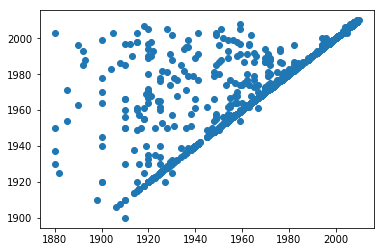

In [102]:
plt.scatter(df['YearBuilt'], df['GarageYrBlt'])

In [14]:
df['MasVnrType'].value_counts()
df['MasVnrType'].value_counts().sum()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

1452